# DBSCAN(Density Based Spatial Clustering with Application of Noise)

In [1]:
# importing data manupulation and visualization liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')

#liberaries for perprocessing and model

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [3]:
# converted ID columns into index column

In [4]:
# statistical analysis
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
# most of the columns are having outliers

In [6]:
# checking for null values
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.duplicated().sum()

1

there is one duplicate row

In [8]:
# drop duplicate row
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
# checking data types
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [11]:
# all columns are in their proper format

In [12]:
df.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

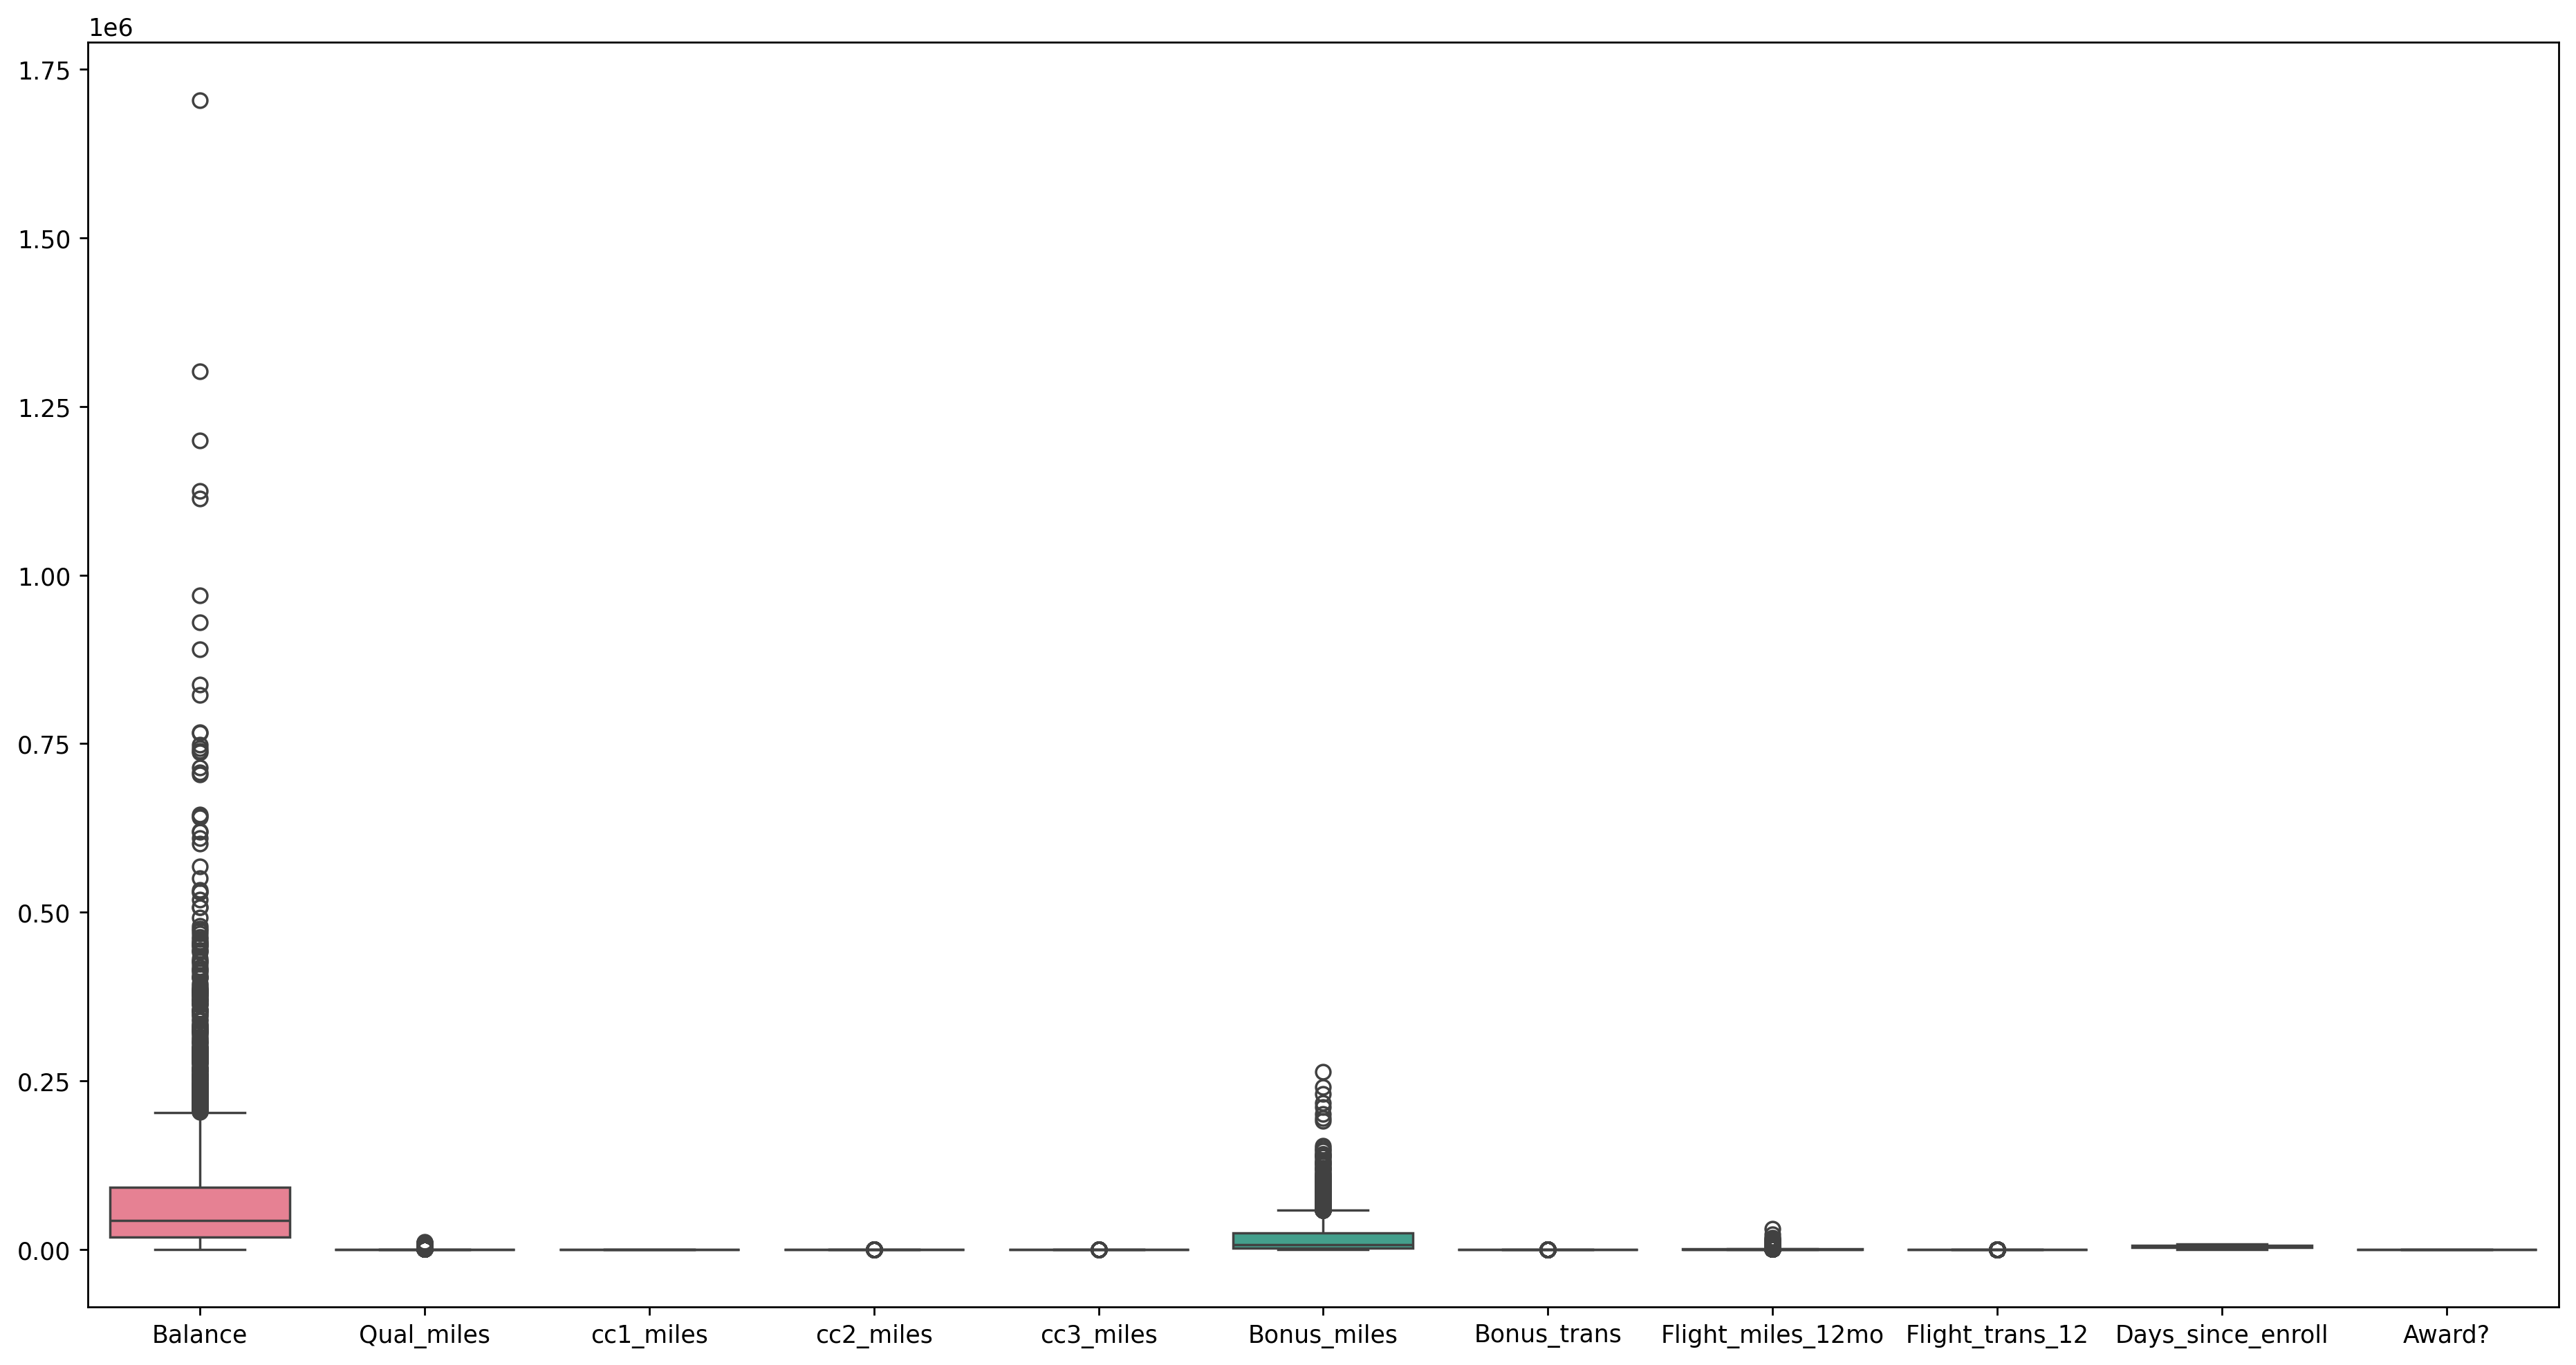

In [13]:
# confirm outliers with boxplot
sns.boxplot(df)
# to prevent the overlaping of column labels on x-axis
plt.tight_layout()

### I am keeping outliers as it is because DBSCAN is capable of detecting outliers and seperating them out from the core and border datapoints

# Feature Engineering

In [14]:
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0


In [15]:
# according to the data dictionary provided me 
# these three columns are not important so I dropped because these were causing curse of dimensionality

df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles'], inplace=True)

# DATA TRANSFORMATION

In [16]:
# transformation
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-4.51293870e-01, -1.86322793e-01, -7.02920270e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.01222508e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -5.39396845e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  3.43604805e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -6.89420995e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.10125404e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [17]:
# just to see the scaled data in tabular format
pd.DataFrame(x, columns=df.columns)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451294,-0.186323,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


In [18]:
df.shape

(3998, 8)

# MODEL BUILDING

In [19]:
model = DBSCAN(eps=0.5, min_samples=3)
ypred = model.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [20]:
len(ypred)

3998

In [21]:
silhouette_score(x, ypred)

-0.1990795479410637

### silhouette score is almost close to zero( 0 ) that means clusters has not been identified properly.
### The reason of bad silhouette score  : I have randomly chosen epsilon value and min_samples parameters value which is not ideal for detecting the clusters properly.
### The solution of this problem is:   Hyperpameter Tunning to find out the Ideal epsilon value

# Hyperparameter Tunning

In [22]:
# fitting the model (training)
neighbor = NearestNeighbors(n_neighbors=3).fit(x)

In [23]:
# claculate the distances from 3 nearest  neighbors
neighbor.kneighbors(x)

(array([[0.        , 0.11185195, 0.12033566],
        [0.        , 0.11406716, 0.11438169],
        [0.        , 0.16540105, 0.19458411],
        ...,
        [0.        , 0.16614444, 0.28024134],
        [0.        , 0.25725538, 0.27165991],
        [0.        , 0.00270567, 0.01129616]]),
 array([[   0,  378,  363],
        [   1,    3,  363],
        [   2,  338,  368],
        ...,
        [3995, 3876, 3800],
        [3996, 3623, 3881],
        [3997, 3491, 3455]], dtype=int64))

### it has returned me distances from 3 nearest neighbors and the indeces of those datapoints

In [24]:
# store the distances for further use
distances, index =  neighbor.kneighbors(x)
distances

array([[0.        , 0.11185195, 0.12033566],
       [0.        , 0.11406716, 0.11438169],
       [0.        , 0.16540105, 0.19458411],
       ...,
       [0.        , 0.16614444, 0.28024134],
       [0.        , 0.25725538, 0.27165991],
       [0.        , 0.00270567, 0.01129616]])

I want only the distance from the second nearest neighbor to plot k-nearest distance plot

In [25]:
second_neighbor = distances[:, 1]

In [26]:
# now I need to sort the distances
second_neighbor = np.sort(distances[:, 1])
second_neighbor

array([2.26429338e-03, 2.26429338e-03, 2.70567023e-03, ...,
       6.00761912e+00, 6.67812374e+00, 7.13540366e+00])

In [27]:
# sho

Text(0.5, 1.0, 'K-distance Plot')

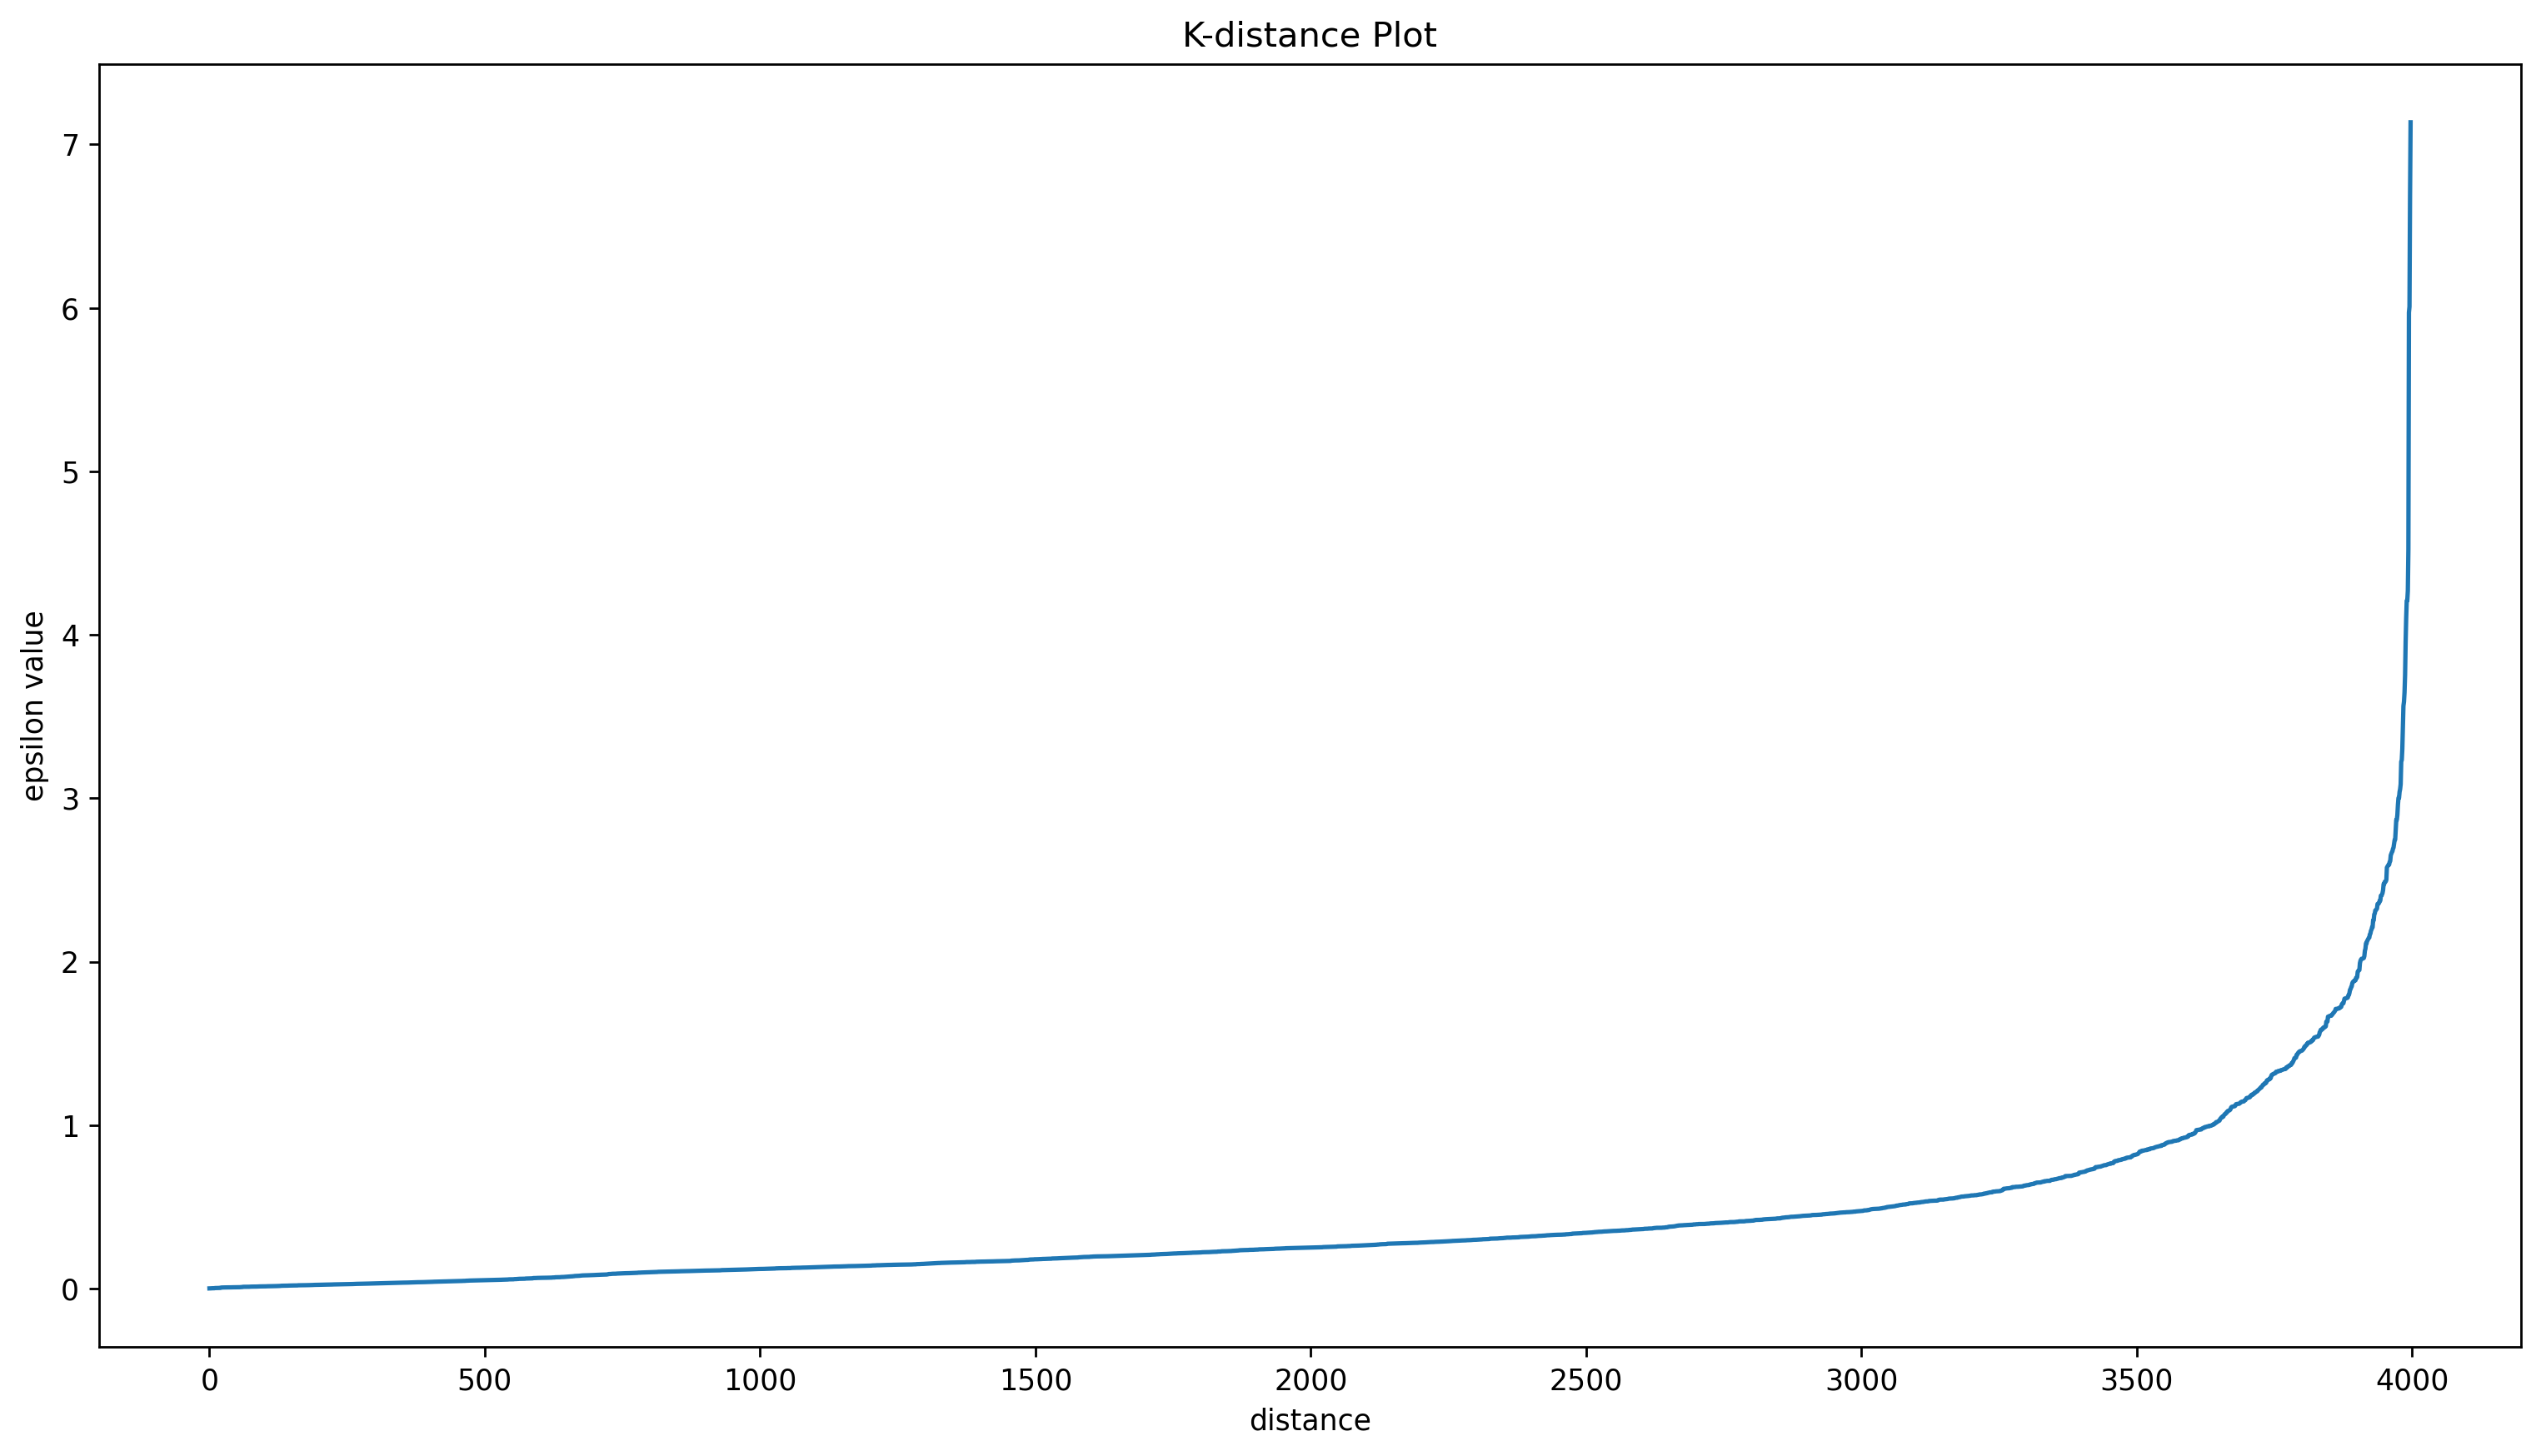

In [28]:
 # plot k-nearest distance plot
plt.plot(second_neighbor)
plt.xlabel('distance')
plt.ylabel('epsilon value')
plt.title('K-distance Plot')

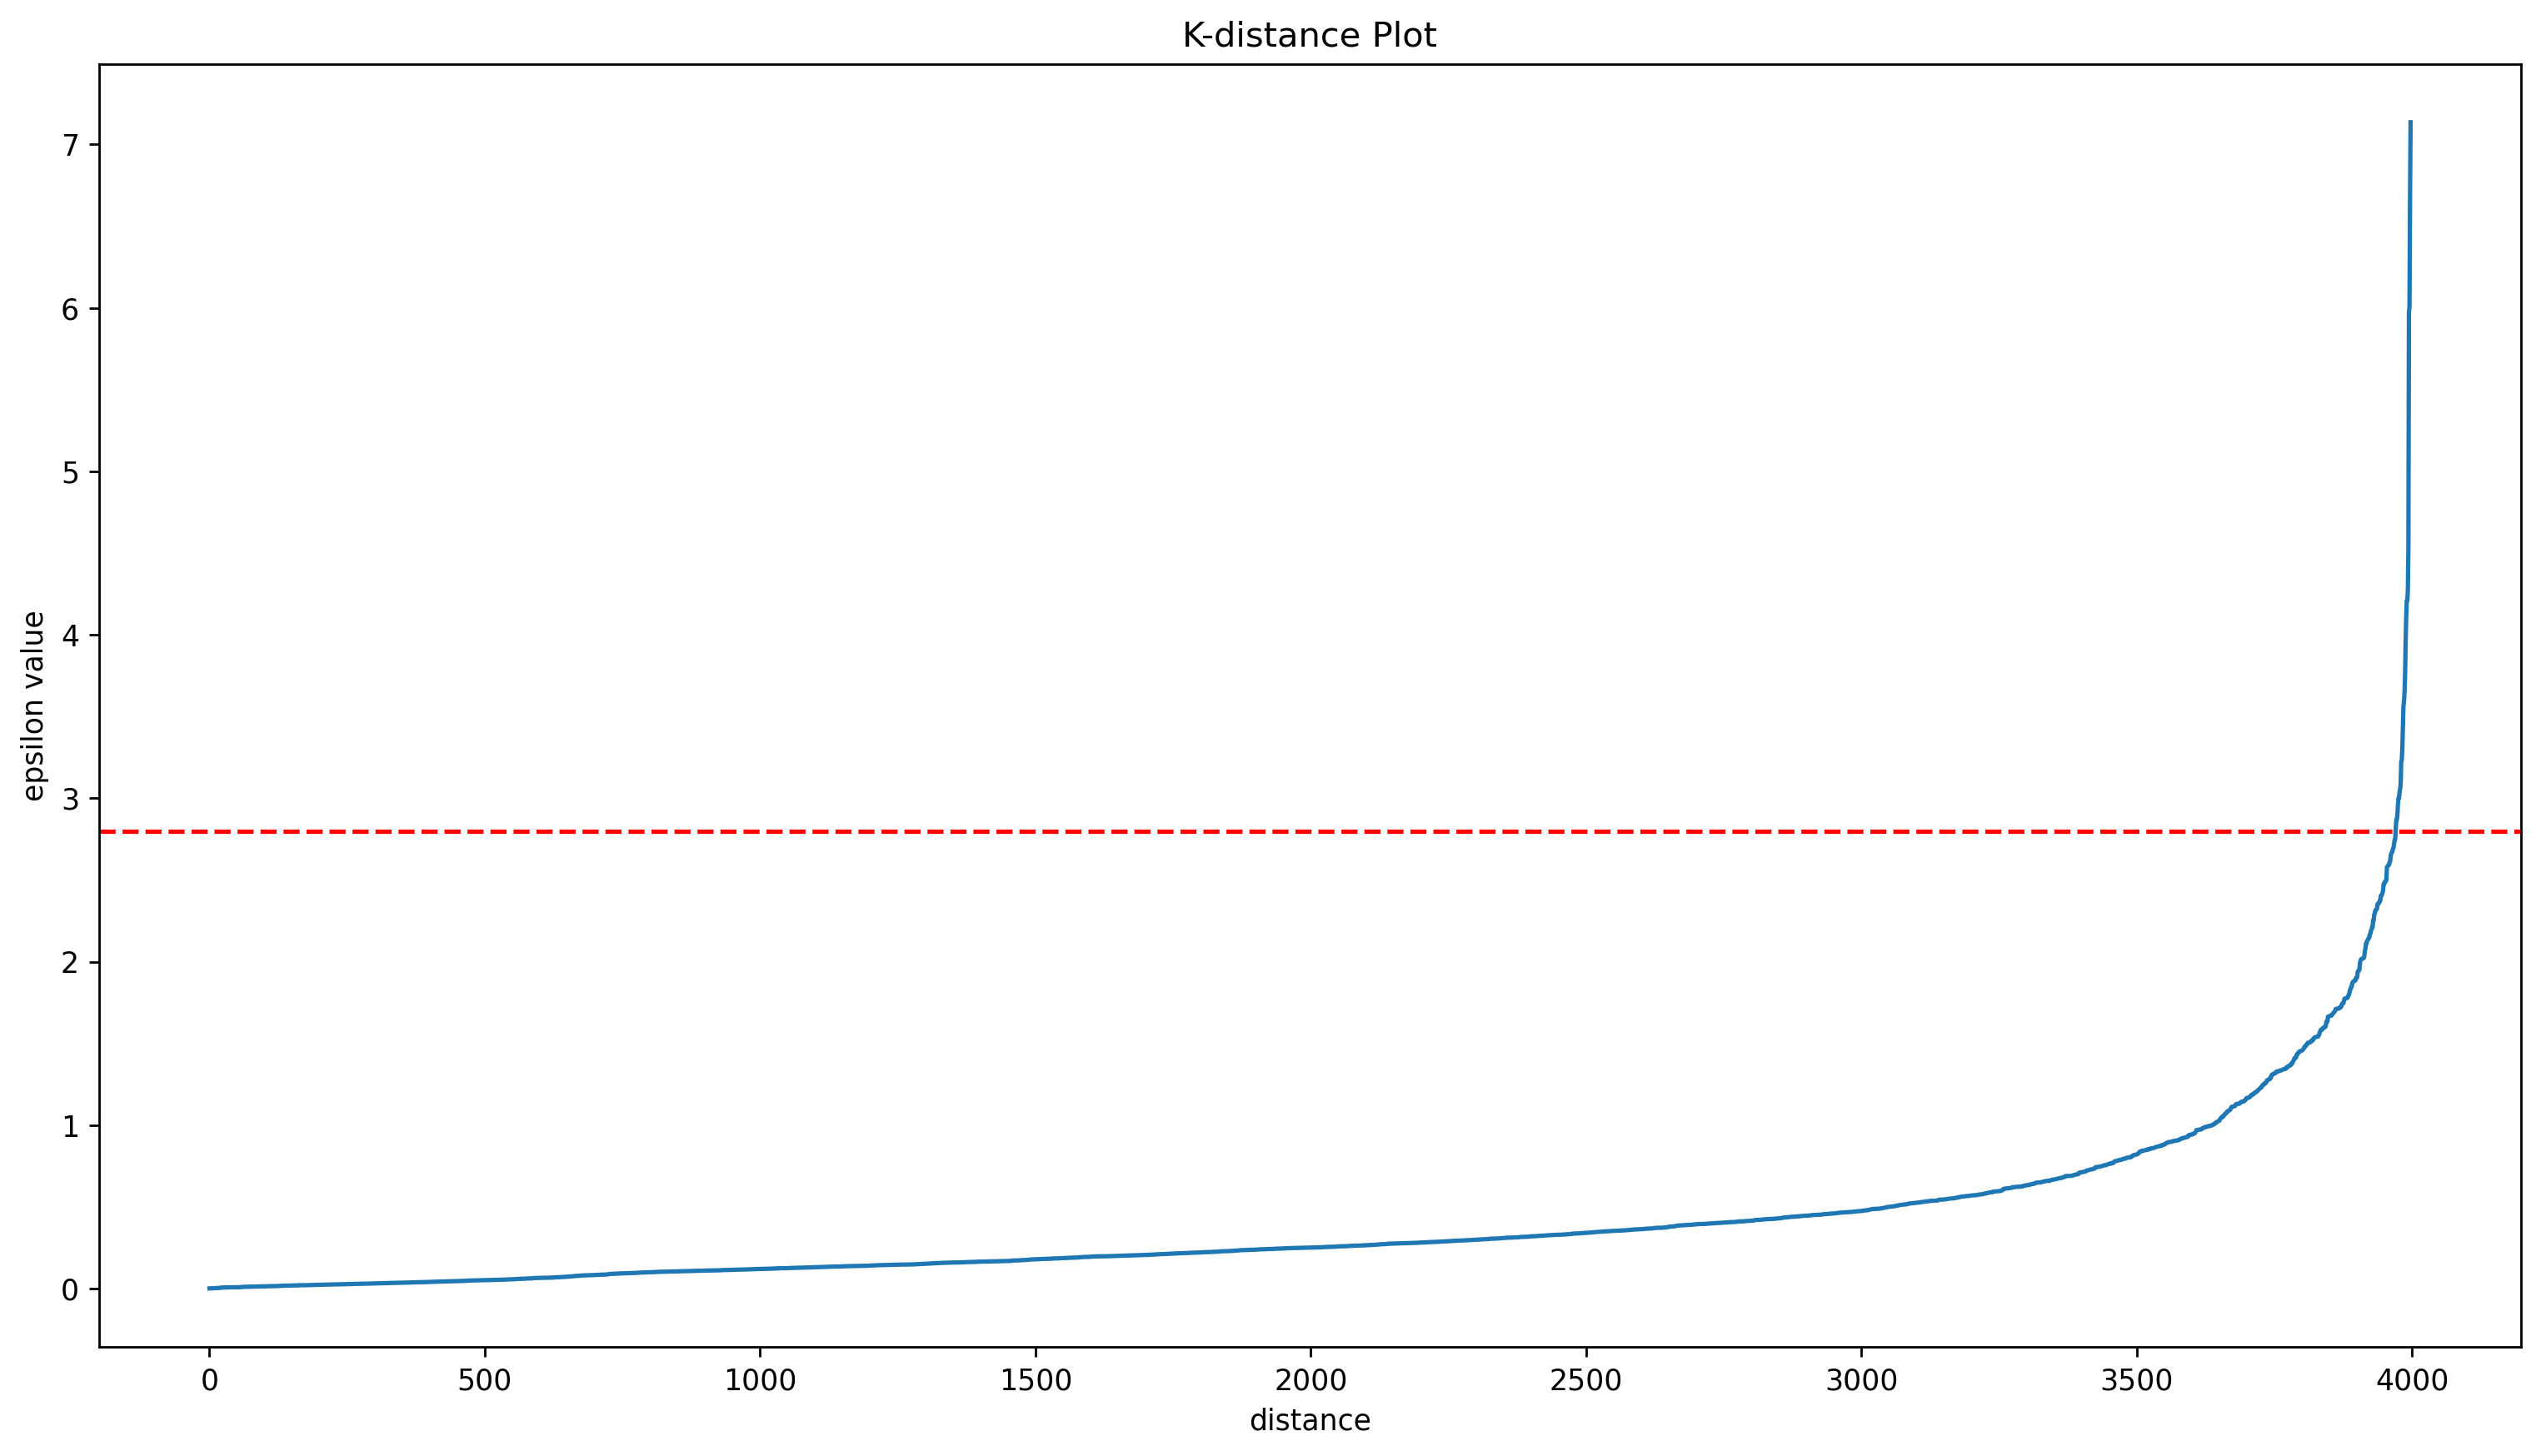

In [29]:
# plot a horizontal line
plt.plot(second_neighbor)
plt.xlabel('distance')
plt.ylabel('epsilon value')
plt.title('K-distance Plot')
plt.axhline(y=2.8, color='red', linestyle='--' )

In [30]:
# ideal epsilon value is almost 2
# I need to test multiple epsilon value which is colse to 2 and 3

# Final Model Building

In [31]:
model = DBSCAN(eps=2.8, min_samples=3)
ypred = model.fit_predict(x)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
# After testing multiple values from 1.5 to 3.0 for epsilon value, 2.8 is giving the best result so I used it for the final model building

# Evaluation of the Model

In [33]:
silhouette_score(x, ypred)

0.622681055878214

#### it is a good accuracy but not the best because I have small dataset.
#### If I want to increase the accuracy of the model then I need to increse the amount of data.

# Analysis Of Clusters

In [34]:
# checking how many clusters has been created by DBSCAN
np.unique(ypred)

array([-1,  0,  1], dtype=int64)

### DBSCAN label outliers datapoints as -1

### DBSCAN has created total 2 clusters and it has labelled them as   0, 1

In [35]:
# storing these label in the dataframe
df['clusters'] = ypred
df

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
ID#,,,,,,,,,
1,28143,0,174,1,0,0,7000,0,0
2,19244,0,215,2,0,0,6968,0,0
3,41354,0,4123,4,0,0,7034,0,0
4,14776,0,500,1,0,0,6952,0,0
5,97752,0,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...
4017,18476,0,8525,4,200,1,1403,1,0
4018,64385,0,981,5,0,0,1395,1,0
4019,73597,0,25447,8,0,0,1402,1,0


In [36]:
# analyse the clusters
df.groupby('clusters').agg('mean')

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters,,,,,,,,
-1,425846.694444,1409.305556,69258.000000,35.611111,8119.527778,20.916667,5447.916667,0.888889
0,70397.652097,132.789035,16478.175846,11.379232,390.686710,1.196311,4107.568469,0.365083
1,91580.250000,0.000000,212083.000000,18.750000,280.500000,1.250000,3660.250000,1.000000


In [37]:
df['clusters'].value_counts()

clusters
 0    3958
-1      36
 1       4
Name: count, dtype: int64

# ANALYSIS:

## we can clearly see that:
### most of the people have been grouped in 1st cluster (cluster_label 0) because majority of people are having similar Balance (Number of miles eligible for award travel) 
### and 
### Bonus_miles ( Number of miles earned from non-flight bonus transactions in the past 12 months ).

## some small number of people have been grouped in 2nd cluster (cluster_label 1) because these small number of people are having high amount of 
## Balance (Number of miles eligible for award travel) 
### and 
## Bonus_miles ( Number of miles earned from non-flight bonus transactions in the past 12 months ) in comaprision to the 1st cluster (cluster_label 0) .